# Pandas
---

## Lectura de datos con pandas
Pandas es una módulo que permite lectura y manipulación de datos de una manera práctica.

Para almacenar los datos en una variable se utilizan los métodos:
```py
- pandas.read_csv(<nombre-de-archivo>, sep=<tipo-de-separador>)
- pandas.read_excel(<archivo-excel>)
```

El nombre estándar para importar pandas es `pd` y el nombre de variable para un `DataFrame` es `df`, por lo que la línea típica de lectura de datos es:
`df = pd.read_csv`

In [21]:
import pandas as pd
df = pd.read_excel('data.xlsx')

In [26]:
df
# df["x"]
# df["x"].values

,x,y
0,1,2
1,2,5
2,3,6
3,4,12
4,5,20
5,6,30
6,7,50
7,8,85
8,9,99
9,10,125


# SciPy

---

SciPy es una librería que recopila múltiples funciones de interés en el ámbito científico. En este momento nos centramos en `scipy.optimize`

## scipy.optimize
`scipy.optimize` posee las funciones `minimize` y `curve_fit` que permiten el ajuste de funciones a datos reales.

### curve fit

`curve_fit` es una función que recibe:

- Una función estrucutrada como `f(x, *parametros)`
- Datos de $x$ experimentales.
- Datos de $y$ experimentales.
    - Otros parámetros opcionales.
    
 Y devuelve una tupla de dos elementos:
 
 - popt: Parámetros luego de optimizar.
 - pcov: Matriz de covarianza de parámetros ajustados. 
 
 
 > Utiliza los mínimos cuadrados ($\sum_i(y_i - f(x_i))^2$) como función objetivo para realizar el ajuste.

In [27]:
from scipy.optimize import curve_fit

curve_fit?

In [ ]:
from numpy import exp

def f1(x, a, b):
    y = a*x + b
    return y

def f2(x, a, b, c):
    y = a*x**2 + b*x + c
    return y

def f3(x, a, b, c):
    y = a*exp(b*x) + c
    return y

In [30]:
curve_fit(f1, df["x"], df["y"])
#curve_fit(f1, df["x"], df["y"])[0]

(array([ 13.84242424, -32.73333333]),
 array([[  3.05507804, -16.80292938],
        [-16.80292938, 117.62050675]]))

In [ ]:
a, b = curve_fit(f1, df["x"], df["y"])[0]

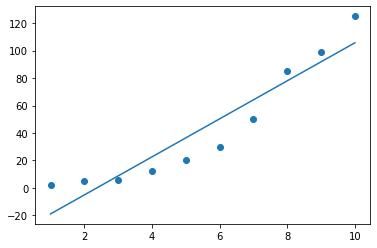

In [31]:
plt.scatter(df["x"], df["y"])
plt.plot(x, f1(x, a, b), label="f1")

In [33]:
params1 = curve_fit(f1, df["x"], df["y"])[0]
params2 = curve_fit(f2, df["x"], df["y"])[0]
params3 = curve_fit(f3, df["x"], df["y"])[0]

array([ 13.84242424, -32.73333333])

(0.0, 150.0)

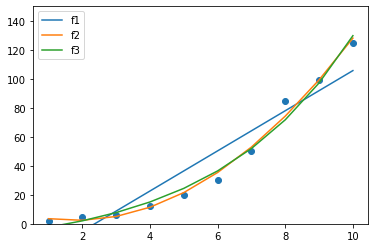

In [34]:
import matplotlib.pyplot as plt

x = df["x"].values
y = df["y"].values

plt.scatter(df["x"], df["y"])
plt.plot(x, f1(x, *params1), label="f1")
plt.plot(x, f2(x, *params2), label="f2")
plt.plot(x, f3(x, *params3), label="f3")

plt.legend()
plt.ylim(0, 150)

### minimize

`minimize` es una función que, como claramente lo dice, minimiza. Recibe

- Una función estrcturuada como `f(X, *args)`
- Valores iniciales de X.
- Argumentos extra de la función.
    - Otros parámetros opcionales
    
A modo de ejemplo, se va a minimizar la función error en valor absoluto:

$\sum_i|y_i - f(x_i)|$

In [36]:
from scipy.optimize import minimize
#minimize?

In [37]:
def f1(x, a, b):
    y = a*x + b
    return y


def f1_obj(X):
    a, b = X
    
    y = df["y"]
    x = df["x"]
    
    error = sum(abs(y - f1(x, a, b)))
    return error

In [40]:
minimize(f1_obj, x0=[1, 1])

      fun: 120.86768486400737
 hess_inv: array([[ 0.01956276, -0.04860166],
       [-0.04860166,  0.12074584]])
      jac: array([-1.19339371, -2.        ])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 564
      nit: 16
     njev: 184
   status: 2
  success: False
        x: array([ 15.55252639, -40.97273759])

#### Función objetivo genérica

En el caso anterior es necesario generar una función objetivo para cada función que se quiere ajustar.

Cómo se puede solucionar esto?

In [ ]:
# Inyección de dependencia!

def f_obj(X, *args):
    """Función objetivo genérica
    X: Parámetros a ajustar.
    args: Set de argumentos de función objetivo
          [función_a_ajustar, valores_x, valores_y]
    """
    f = args[0]
    x = args[1]
    y = args[2]
    
    y_prediccion = f(x, *X)
    
    funcion_objetivo = sum(abs(y - y_prediccion))
    return funcion_objetivo

In [41]:
sol1 = minimize(f_obj, x0=[1, 2], args=(f1, df["x"], df["y"]))

sol2 = minimize(f_obj, x0=[1, 2, 3], args=(f2, df["x"], df["y"]))

In [43]:
sol2

      fun: 96.7183982262619
 hess_inv: array([[ 0.38302329, -0.52011111, -0.04533393],
       [-0.52011111,  0.72181223, -0.04821154],
       [-0.04533393, -0.04821154,  0.99729232]])
      jac: array([32.22777939,  1.        ,  4.        ])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 220
      nit: 1
     njev: 52
   status: 2
  success: False
        x: array([0.96433041, 1.98811014, 2.99624531])

In [44]:
sol3 = minimize(f_obj, x0=[1, 2, 4], args=(f3, df["x"], df["y"]))

/usr/lib/python3.10/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/ruther/.local/lib/python3.10/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/usr/lib/python3.10/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


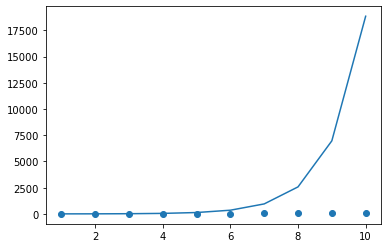

In [45]:
plt.scatter(x, df.y)
plt.plot(x, f3(x, *sol3.x))

In [46]:
sol3 = minimize(f_obj, x0=[1, 2, 4], args=(f3, df["x"], df["y"]), method='COBYLA')

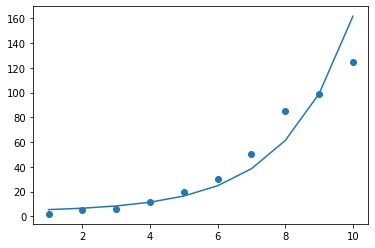

In [47]:
plt.scatter(x, df.y)
plt.plot(x, f3(x, *sol3.x))

Referencias

- [Pandas](https://pandas.pydata.org/docs/index.html)
- [read_excel](https://pandas.pydata.org/docs/reference/api/pandas.read_excel.html?highlight=pandas%20read_excel#pandas.read_excel)
- [SciPy](https://docs.scipy.org/)
- [minimize](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html)
- [curve_fit](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html)